# Project Proposal - Group 4

By Tianne Lee, Steven Tsai, Chloe Zhang, Jinghan Xu

## Introduction

From elliptical, flat leaves to spiky, needle shaped, plant leaves have evolved to distinct shapes and sizes to adapt the wide ranges of living conditions earth has to offer. However, some leaves still look similar despite coming from very different plant species. In our project, we are interested in comparing the leaves of two different plant species, *Betula pubescens* (class 9 in the dataset) and *Tilia tomentosa* (class 10 in the dataset).

<p align="center">
<img src="data/leaf9_leaf10.png" alt="image source: ReadMe.pdf" width="40%"/>
</p>

In the above picture, we can see that the two leaves share similar features. The goal of our study is to find out whether the mean smoothness<sup>[1](#myfootnote1)</sup> and solidity of Tilia tomentosa (class 10) is larger than Betula pubescens (class 9).

We will use a leaf dataset retrived from the [UCI Machine Learning Respotory](https://archive.ics.uci.edu/ml/datasets/Leaf). This dataset contains 16 shape and texture features of 40 plant species. We will only focus on the Tilia tomentosa & Betula pubescens species, and solidity & smoothness features.

<a name="myfootnote1">1</a>: Smoothness ranges between 0 and 1, with the value increasing as roughness increases.

## Preliminary Results

In [1]:
library("tidyverse")
library("dplyr")
library("broom")
library("infer")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Read dataset and add column names for readability:

In [2]:
raw_leaf <- read_csv("data/leaf.csv", show_col_types = FALSE, col_names = c(
    "Class", "Specimen_Number", "Eccentricity", "Aspect_Ratio",
    "Elongation", "Solidity", "Stochastic_Convexity", "Isoperimetric_Factor",
    "Maximal_Indentation_Depth", "Lobedness", "Average_Intensity", "Average_Contrast", # nolint
    "Smoothness", "Third_moment", "Uniformity", "Entropy"))
head(raw_leaf)

Class,Specimen_Number,Eccentricity,Aspect_Ratio,Elongation,Solidity,Stochastic_Convexity,Isoperimetric_Factor,Maximal_Indentation_Depth,Lobedness,Average_Intensity,Average_Contrast,Smoothness,Third_moment,Uniformity,Entropy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.0046566,0.0039465,0.0477900,0.127950,0.0161080,0.00523230,2.7477e-04,1.17560
1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.0052423,0.0050016,0.0241600,0.090476,0.0081195,0.00270800,7.4846e-05,0.69659
1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.0074573,0.0101210,0.0118970,0.057445,0.0032891,0.00092068,3.7886e-05,0.44348
1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.0068768,0.0086068,0.0159500,0.065491,0.0042707,0.00115440,6.6272e-05,0.58785
1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.0074280,0.0100420,0.0079379,0.045339,0.0020514,0.00055986,2.3504e-05,0.34214
1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.0049451,0.0044506,0.0104870,0.058528,0.0034138,0.00112480,2.4798e-05,0.34068


Clean and wrangle the dataset. Drop irrelevant columns and rows. Keep `Solidity` and `Smoothness` as the response variables and extract the rows of class 9 and class 10:

In [3]:
leaf <- raw_leaf %>% 
    mutate(Class = as.factor(Class)) %>% 
    select(Class, Solidity, Smoothness) %>% 
    filter(Class == 9 | Class == 10)
head(leaf)

Class,Solidity,Smoothness
<fct>,<dbl>,<dbl>
9,0.90378,0.029213
9,0.91793,0.022362
9,0.93409,0.015397
9,0.89009,0.035592
9,0.89752,0.022099
9,0.88831,0.019917


Compute the mean and standard deviation of Solidity:

In [4]:
solidity_estimates <- leaf %>%
    group_by(Class) %>%
    summarise(
        mean = mean(Solidity),
        sd = sd(Solidity)
    )
solidity_estimates

Class,mean,sd
<fct>,<dbl>,<dbl>
9,0.9035421,0.02554533
10,0.9325131,0.01740470


Compute the mean and standard deviation of Smoothness:

In [5]:
smoothness_estimates <- leaf %>%
    group_by(Class) %>%
    summarise(
        mean = mean(Smoothness),
        sd = sd(Smoothness)
    )
smoothness_estimates

Class,mean,sd
<fct>,<dbl>,<dbl>
9,0.02204743,0.008134297
10,0.04633923,0.015247897


Plot the distribution of solidity and smoothness of the two categories:

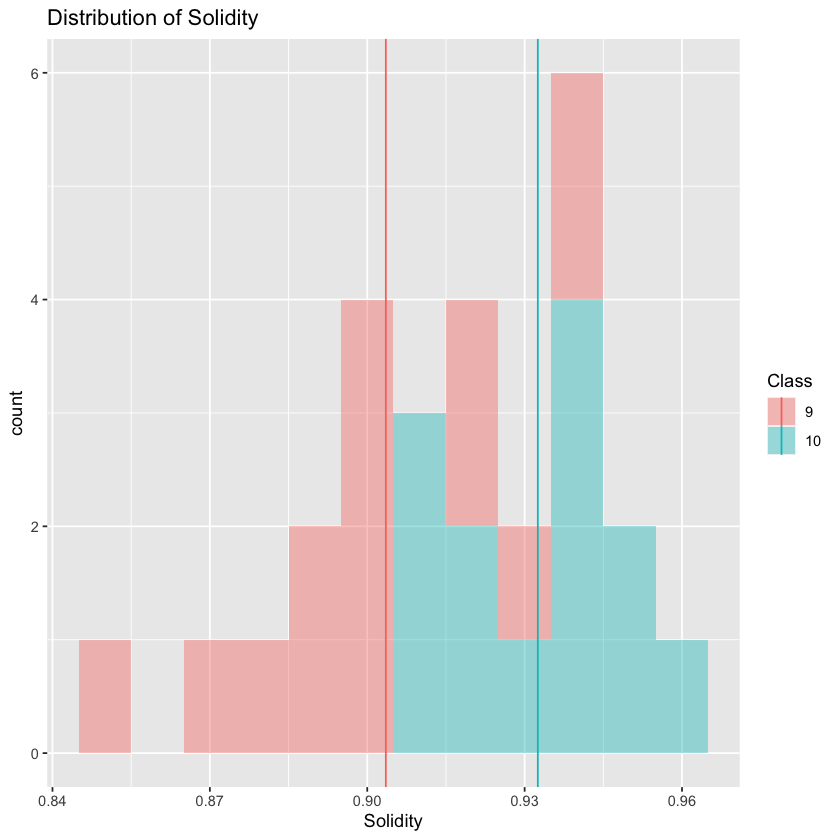

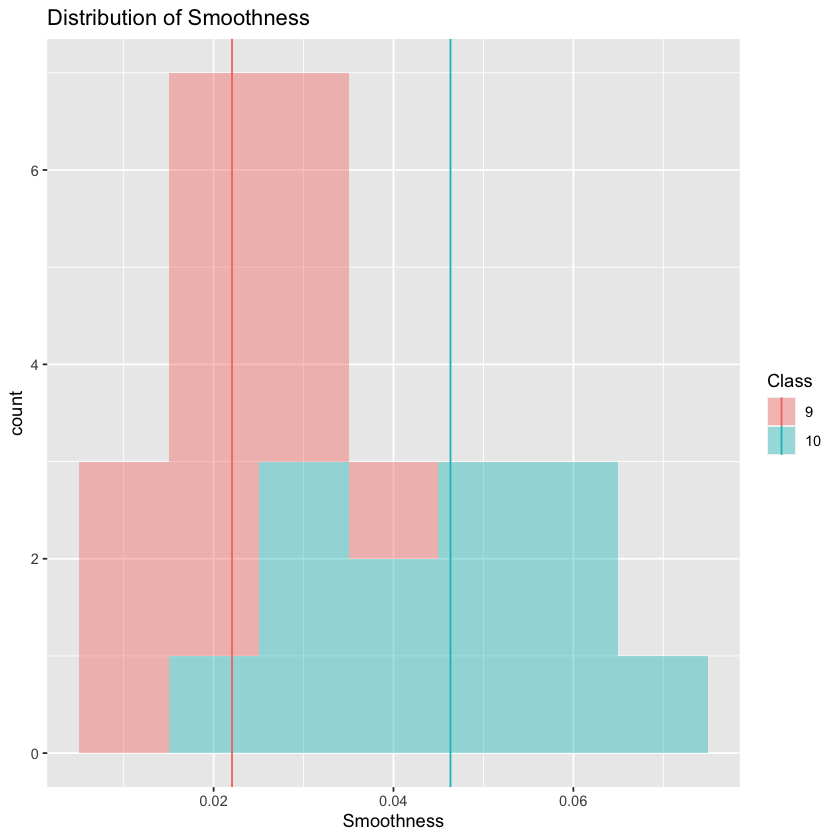

In [6]:
solidity_dist <- leaf|> 
    ggplot(aes(x = Solidity, fill = Class)) +
    geom_histogram(binwidth = 0.01, alpha = 0.4)+
    ggtitle("Distribution of Solidity")+
    geom_vline(data = solidity_estimates, aes(xintercept = mean, color = Class))

smoothness_dist <- leaf|> 
    ggplot(aes(x = Smoothness, fill = Class)) +
    geom_histogram(binwidth = 0.01, alpha = 0.4)+
    ggtitle("Distribution of Smoothness")+
    geom_vline(data = smoothness_estimates, aes(xintercept = mean, color = Class))

solidity_dist
smoothness_dist

## Methods: Plan

**Reservation for the plots and estimates**: The sample size of the 2 classes we are interested in are 14 and 13 respectively which are not large enough for us to find the specific numerical patterns and get a convincing result. The two variances of the data are large, resulting in less precise of the outcome.

**Next, making some adjustments for our dataset**. To improve the precision of our findings with the limited observations, we are going to conduct an enhanced experimental analysis. By bootstrap sampling the original data (with sample size of 14 and 13 respectively and 500 repeats) & using the asymptotics method, we can improve the precision of our previous findings. 

Now, let's test our expected preliminary findings, tomentosa (class 10) is smoother and more solid than Betula pubescens (class 9). The **hypothesis** are as follow: (Set the significant level for all the hypothesis testing: 0.05, and we need to find 90% CI for each distribution)
-  $H_{10}$: the mean solidity of Tilia tomentosa (class 10) is same as Betula pubescens (class 9).
-  $H_{1A}$: the mean solidity of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).

-  $H_{20}$: the mean smoothness of Tilia tomentosa (class 10) is same as Betula pubescens (class 9).
-  $H_{2A}$: the mean smoothness of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).

**About trustworthy**, since we have resampled for many times which eliminates the variance, the precision of the findings should be higher than directly plotting the observation using the limited data. And we set the significance level $\alpha$ = 0.05 in case of rejecting the null hypothesis while it is true.

**Future question**, as we find the relation of smoothness and solidity between two leaves. Will there be any evidence showing that smoothness can lead to solidity, or vise versa?

(subject to modify) we are testing the solidity/smoothness of two types of leaves, thus we will test the differences between teh two independent means (or using two sample t test)
...(bullshit more)
...(add more markdown cells to elaborate: first t test for solidity, second for smoothness)

In [7]:
solidity_mean_diff  <- leaf %>% 
    specify(formula = Solidity ~ Class) %>% 
    calculate(stat = "diff in means", order = c("10", "9"))

solidity_mean_diff

smoothness_mean_diff  <- leaf %>% 
    specify(formula = Smoothness ~ Class) %>% 
    calculate(stat = "diff in means", order = c("10", "9"))

smoothness_mean_diff

Dropping unused factor levels c("1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "13", "14", "15", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36") from the supplied explanatory variable 'Class'.



stat
<dbl>
0.02897093


Dropping unused factor levels c("1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "13", "14", "15", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36") from the supplied explanatory variable 'Class'.



stat
<dbl>
0.0242918


In [8]:
set.seed(1234)

bootstrap_solidity <- 
     leaf %>% 
     specify(formula = Solidity ~ Class) %>% 
     hypothesize(null = "independence") %>% 
     generate(type = "permute", reps = 10000) %>% 
     calculate(stat = "diff in means", order = c("10", "9"))

head(bootstrap_solidity)

bootstrap_smoothness <- 
     leaf %>% 
     specify(formula = Smoothness ~ Class) %>% 
     hypothesize(null = "independence") %>% 
     generate(type = "permute", reps = 10000) %>% 
     calculate(stat = "diff in means", order = c("10", "9"))

head(bootstrap_smoothness)

Dropping unused factor levels c("1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "13", "14", "15", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36") from the supplied explanatory variable 'Class'.



replicate,stat
<int>,<dbl>
1,0.0097860989
2,0.0001506593
3,-0.0069509341
4,0.0029574725
5,0.0045967582
6,-0.0257114835


Dropping unused factor levels c("1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "13", "14", "15", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36") from the supplied explanatory variable 'Class'.



replicate,stat
<int>,<dbl>
1,-0.003810302
2,-0.008306247
3,-0.004543011
4,0.009275945
5,0.002686313
6,-0.006699747


In [9]:
p_value_solidity = bootstrap_solidity %>% get_p_value(obs_stat = solidity_mean_diff, direction = "right")
p_value_solidity # p value < 0.01

p_value_smoothness = bootstrap_solidity %>% get_p_value(obs_stat = smoothness_mean_diff, direction = "right")
p_value_smoothness # p value < 0.01

p_value
<dbl>
0.0012


p_value
<dbl>
0.0078


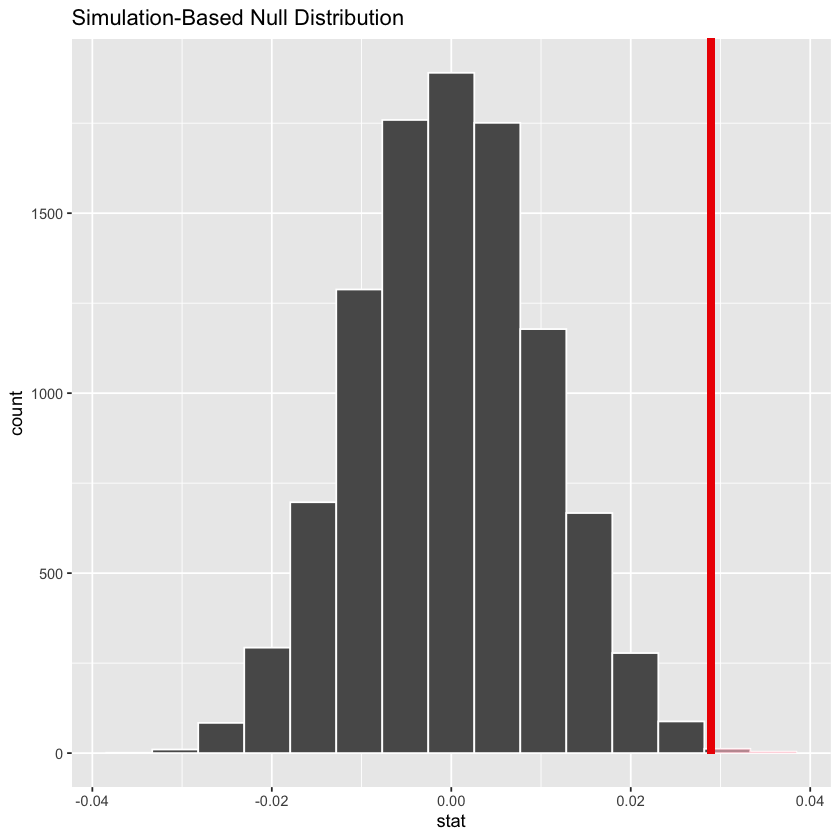

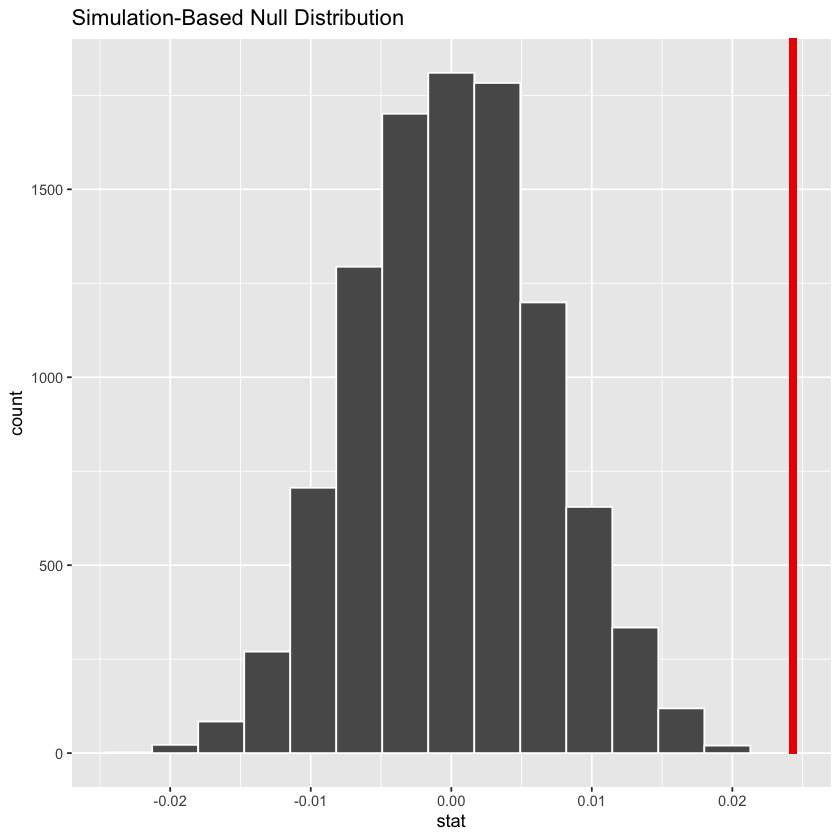

In [10]:
shade_pva_solidity <- 
bootstrap_solidity %>%
visualize() +
shade_p_value(solidity_mean_diff, direction = "right")
shade_pva_solidity

shade_pva_smoothness <-
bootstrap_smoothness%>%
visualize() +
shade_p_value(smoothness_mean_diff, direction = "right")
shade_pva_smoothness

In [11]:
solidity_ci_0.9 <- bootstrap_solidity%>%
get_confidence_interval(level = 0.9)
solidity_ci_0.9

smoothness_ci_0.9 <- bootstrap_smoothness%>%
get_confidence_interval(level = 0.9)
smoothness_ci_0.9

lower_ci,upper_ci
<dbl>,<dbl>
-0.01681728,0.01679126


lower_ci,upper_ci
<dbl>,<dbl>
-0.01068777,0.0112059


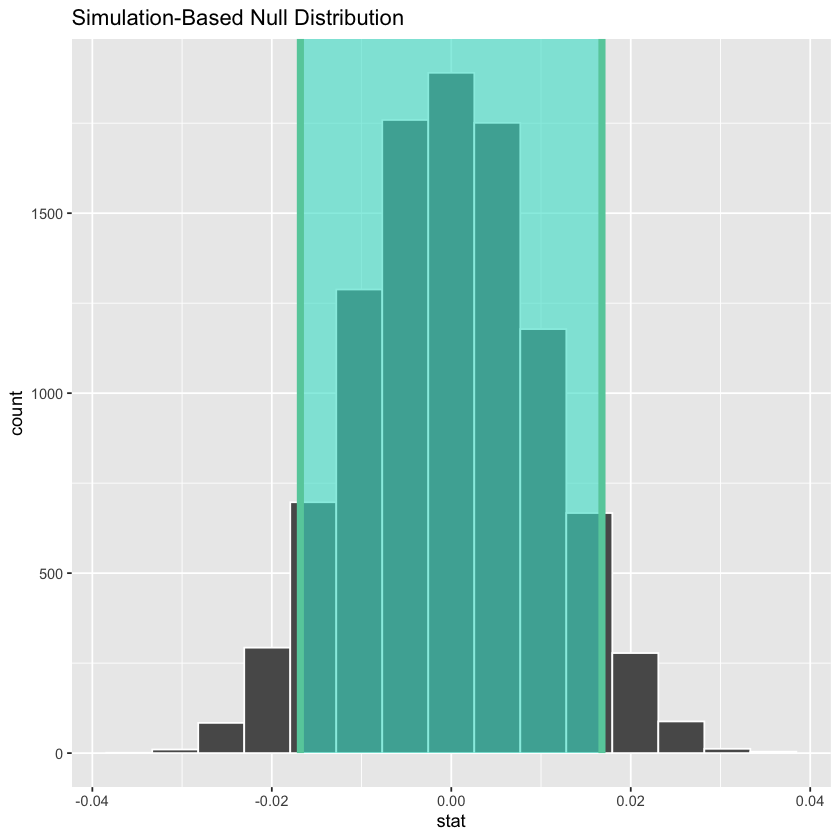

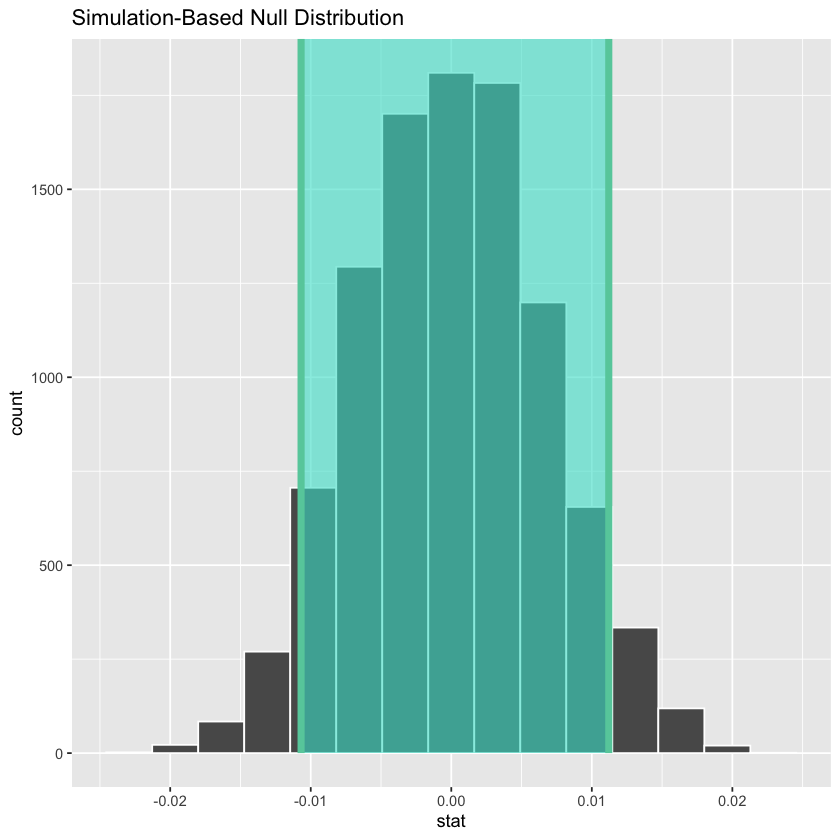

In [12]:
shade_ci_solidity <- 
bootstrap_solidity %>%
visualize() +
shade_confidence_interval(endpoints = solidity_ci_0.9)
shade_ci_solidity

shade_ci_smoothness <-
bootstrap_smoothness%>%
visualize() +
shade_confidence_interval(endpoints = smoothness_ci_0.9)
shade_ci_smoothness

In [13]:
t_test_solidity <- tidy(
    t.test(
        x = leaf %>% filter(Class==10) %>% pull(Solidity),
        y = leaf %>% filter(Class==9) %>% pull(Solidity),
        alternative = 'greater'
    )
)
t_test_solidity

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.02897093,0.9325131,0.9035421,3.46483,0.001049488,23.01543,0.01464092,Inf,Welch Two Sample t-test,greater


In [14]:
t_test_smoothness <- tidy(
    t.test(
        x = leaf %>% filter(Class==10) %>% pull(Smoothness),
        y = leaf %>% filter(Class==9) %>% pull(Smoothness),
        alternative = 'greater'
    )
)
t_test_smoothness

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0242918,0.04633923,0.02204743,5.108611,3.660258e-05,18.01877,0.01604667,Inf,Welch Two Sample t-test,greater


From our Solidity t test result, we gained a p-value of 0.001049488, which is smaller than our $\alpha$ value. Therefore, we reject the null hypothesis and conclude that the mean solidity of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).

From our Smoothness t test result, we gained a p-value of 3.660258e-05, which is smaller than our $\alpha$ value. Therefore, we reject the null hypothesis and conclude that the mean smoothness of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).

## References

"Evaluation of Features for Leaf Discrimination”, Pedro F. B. Silva, Andre R.S. Marcal,
Rubim M. Almeida da Silva (2013), Springer Lecture Notes in Computer Science, Vol.
7950, 197-204.

“Development of a System for Automatic Plant Species Recognition”, Pedro Filipe Silva,
Disserta ̧c ̃ao de Mestrado (Master’s Thesis), Faculdade de Ciˆencias da Universidade do
Porto. Available for download or online reading at http://hdl.handle.net/10216/67734
